# Classification (MultiClass) using SVM & Optimal Parameter Selection 
# This notebook is intended for beginners to provide them a guideline for where to start using Simple Classifier SVM. 
Level : Beginner 

Task-1 : To classify digits from 0 to 9 using MNIST Handdrawn Digits Image Datatset.
*About Data: * Data contains images of hand-drawn digits, from zero through nine. 
Image Details : Gray Scale , 28x28 pixel ,pixel value - 0(lightest) to 255(darkest)

1. Exploring and Preparing Data
2. Support Vector Machine (SVM)
3. Classifcation Using SVM 

*Case1 - GrayScale Images
*case2 - Binary Images
*Case3 - GrayScale + Reduced Dimensions(using PCA)
*Case4 - Binary + Reduced Dimensions(using PCA)
*Comparison of Four Cases 

4. Training Data Size Vs Accuracy, Score & Fitting Time
5. Parameter Selection for SVM Using GridSearchCV
6. Submission

Task-2
* Iris Classification using SVM


Importing required libraries

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt, matplotlib.image as mpimg
import time 
import warnings
from sklearn import svm
from sklearn.model_selection import GridSearchCV

%matplotlib inline
warnings.filterwarnings('ignore')

# 1. Exploring and Preparing Data
Reading data from "train.csv", which will later be divided into train(to train model) and test(to check accuracy). 

In [6]:
data = pd.read_csv('train.csv')
print("Training Data Shape is: ",data.shape)
data.head()

Training Data Shape is:  (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Extracting label from data

In [10]:
label = data.label
data=data.drop('label',axis=1)
print("Data Shape: ",data.shape)
print("Label Shape: ",label.shape)

Data Shape:  (42000, 784)
Label Shape:  (42000,)


In [11]:
data.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

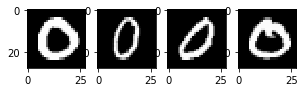

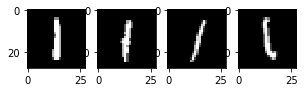

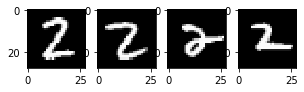

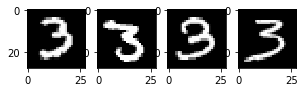

In [13]:
for x in range(0,4):
    train_0=data[label==x]
    data_new=[]
    for idx in train_0.index:
        val=train_0.loc[idx].values.reshape(28,28)
        data_new.append(val)
    plt.figure(figsize=(25,25))   
    for x in range(1,5):
        ax1=plt.subplot(1, 20, x)
        ax1.imshow(data_new[x],cmap='gray')

Having a look at pixel values frequency (0 to 255)

To get a better idea, lets convert the plot to Log Scale.

Based on leading 0s and 255s we can try converting it to binary in the later steps to simplify the problem.

Text(0, 0.5, 'Frequency')

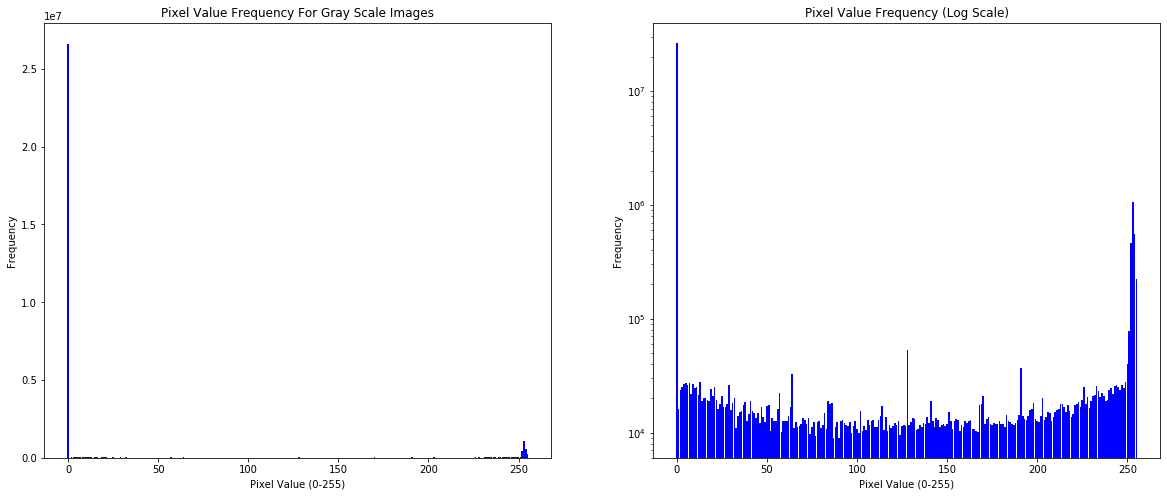

In [14]:
y = pd.value_counts(data.values.ravel()).sort_index() #to count the number of unique values in the given Index.Ravel()returns contiguous flattened array(1D array with all the input-array elements and with the same type as it)
N = len(y)
x = range(N)
width =0.9
plt.figure(figsize=[20,8])
ax1=plt.subplot(1, 2,1)
ax1.bar(x, y, width, color="blue")
plt.title('Pixel Value Frequency For Gray Scale Images')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')
#ax1.imshow(data_new[x],cmap='gray')
ax2=plt.subplot(1, 2,2)
ax2.bar(x, y, width, color="blue")
plt.title('Pixel Value Frequency (Log Scale)')
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')
#plt.yscale('')

Splitting data into Train and Test Data and Labels

Dividing Data randomly into train and test. Out of total train.csv Data, 80% is kept as train for training the model and 20% is kept as test to score the model. 

In [15]:
train, test,train_labels, test_labels = train_test_split(data, label, train_size=0.8, random_state=42)
print("Train Data Shape: ",train.shape)
print("Train Label Shape: ",train_labels.shape)
print("Test Data Shape: ",test.shape)
print("Test Label Shape: ",test_labels.shape)

Train Data Shape:  (33600, 784)
Train Label Shape:  (33600,)
Test Data Shape:  (8400, 784)
Test Label Shape:  (8400,)


# 2. Support Vector Machine (SVM)
*
Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for both classification or regression problems.

It performs classification by finding the hyperplane that maximizes the margin between the two classes.*
To understand better, lets look at the following cases:

CASE 1: 
Here, we have three hyper-planes (A, B and C). 

Now, identify the right hyper-plane to classify star and circle
As per SVM: “Select the hyper-plane which segregates the two classes better”.
Here better means which keeps almost equal margin/distance from both classes. 

Answer : B
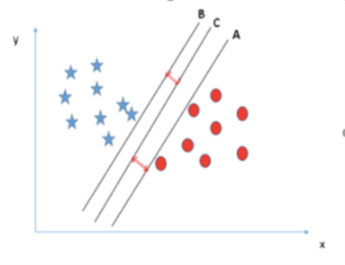

CASE 2: **

Here, we have three hyper-planes (A, B and C). To identify the right hyper-plane to classify star and circle, Maximizing the distances between nearest data point (either class) and hyper-plane will help us to decide the right hyper-plane. This distance is called as Margin 

**Answer : C

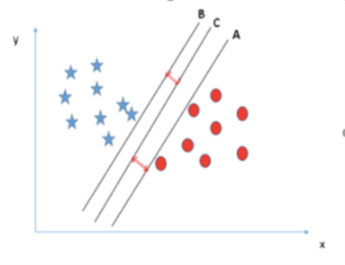

# 3. Classification using SVM

Using SVM Classifier from sklearn library.
We have 33600 training samples, fitting them is going to take alot of time. To keep it simple for now, lets select 5000 out of them.
You can change the value i to use the desired number of samples.

In [16]:
i=5000;
score=[]
fittime=[]
scoretime=[]
clf = svm.SVC(random_state=42)

In [17]:
print("Default Parameters are: \n",clf.get_params)

Default Parameters are: 
 <bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)>


# Case 1 - Gray Scale Images

Fitting train data and finding a score for test data to check model performance

In [18]:
start_time = time.time()
clf.fit(train[:i], train_labels[:i].values.ravel())
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
start_time = time.time()
score=clf.score(test,test_labels)
print("Accuracy for grayscale: ",score)
scoretime = time.time() - start_time
print("Time consumed to score: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))
case1=[score,fittime,scoretime]

Time consumed to fit model:  00:00:47
Accuracy for grayscale:  0.09345238095238095
Time consumed to score:  00:00:38


# Case 2 - Binary Images

To simply the problem, converting images to black and white from gray scale by replacing all values > 0 to 1. 
And Converting 1D array to 2D 28x28 array using [**reshape**](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.reshape.html) , to plot and view **binary** images. 

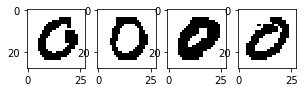

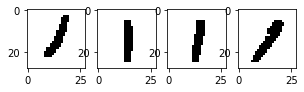

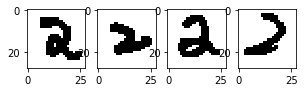

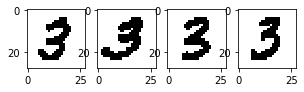

In [19]:
test_b=test
train_b=train
test_b[test_b>0]=1
train_b[train_b>0]=1
for x in range(0,4):
    train_0=train_b[train_labels==x]
    data_new=[]
    for idx in train_0.index:
        val=train_0.loc[idx].values.reshape(28,28)
        data_new.append(val)
    plt.figure(figsize=(25,25))   
    for x in range(1,5):
        ax1=plt.subplot(1, 20, x)
        ax1.imshow(data_new[x],cmap='binary')

In [20]:
start_time = time.time()
clf.fit(train_b[:i], train_labels[:i].values.ravel())
fititme = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
score=clf.score(test_b,test_labels)
start_time = time.time()
clf.fit(train_b[:i], train_labels[:i].values.ravel())
print("Accuracy for binary: ",score)
scoretime = time.time() - start_time
print("Time consumed to score: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))
case2=[score,fittime,scoretime]

Time consumed to fit model:  00:00:47
Accuracy for binary:  0.9111904761904762
Time consumed to score:  00:00:10


# Case 3 - GrayScale + Dimensionality Reduction - PCA 
It is a linear transformation technique used to identify strong patterns in data by finding out variable correlation. It maps the data to a lower dimensional subspace in a way that data variance is maximized while retaining most of the information.
To understand how PCA works, this tutorial may help - Principal Component Analysis Explained
We are using sklearnPCA library here to perform PCA Dimensionality Reduction.

Here, Data is standardized and PCA is performed on data with all the components. Then variance is plotted for all components to decide which components to remove. 

Text(0, 0.5, 'Variance')

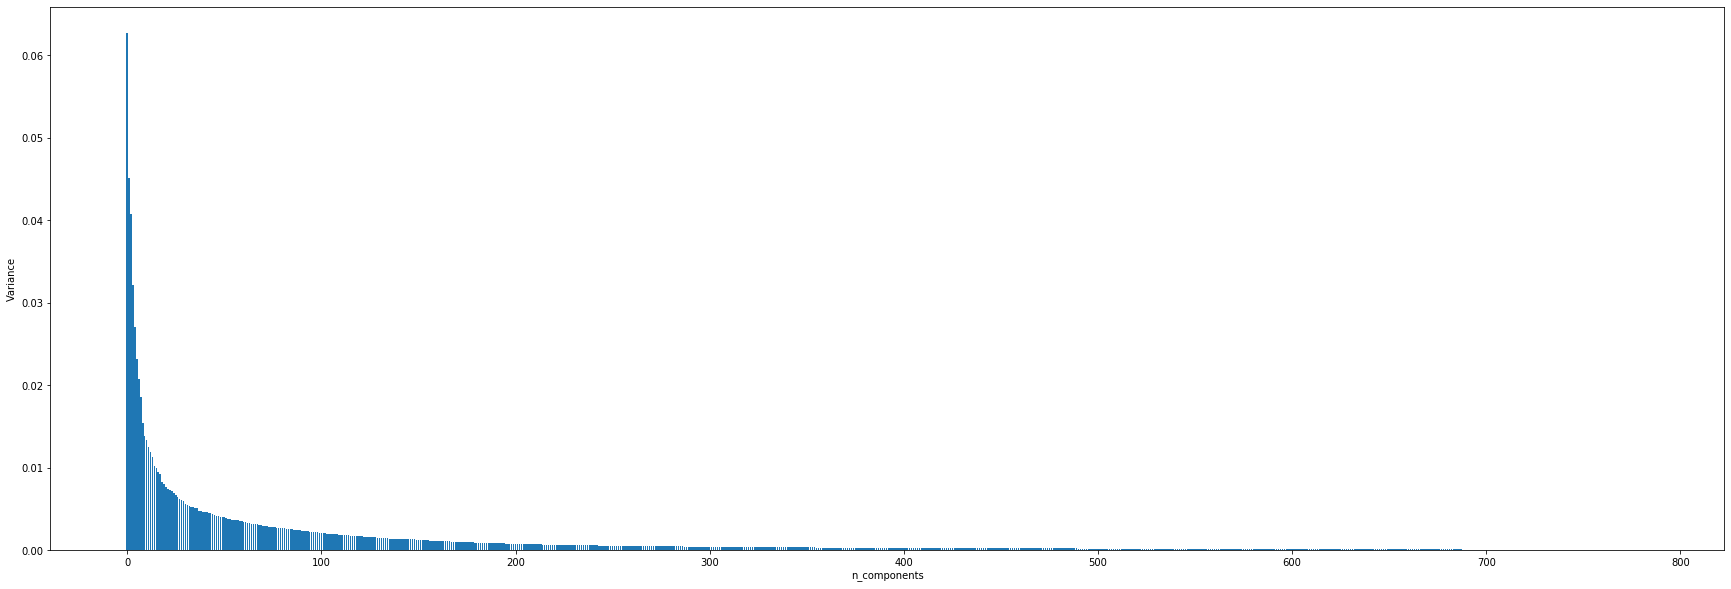

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

#standardized data
sc = StandardScaler().fit(train)
X_std_train = sc.transform(train)
X_std_test = sc.transform(test)

#If n_components is not set then all components are stored 
sklearn_pca = sklearnPCA().fit(X_std_train)
train_pca = sklearn_pca.transform(X_std_train)
test_pca = sklearn_pca.transform(X_std_test)

#Percentage of variance explained by each of the selected components.
#If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.
var_per = sklearn_pca.explained_variance_ratio_
cum_var_per = sklearn_pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(30,10))
ind = np.arange(len(var_per)) 
plt.bar(ind,var_per)
plt.xlabel('n_components')
plt.ylabel('Variance')

In [22]:
n_comp=len(cum_var_per[cum_var_per <= 0.90])
print("Keeping 90% Info with ",n_comp," components")
sklearn_pca = sklearnPCA(n_components=n_comp)
train_pca = sklearn_pca.fit_transform(X_std_train)
test_pca = sklearn_pca.transform(X_std_test)
print("Shape before PCA for Train: ",X_std_train.shape)
print("Shape after PCA for Train: ",train_pca.shape)
print("Shape before PCA for Test: ",X_std_test.shape)
print("Shape after PCA for Test: ",test_pca.shape)

Keeping 90% Info with  288  components
Shape before PCA for Train:  (33600, 784)
Shape after PCA for Train:  (33600, 288)
Shape before PCA for Test:  (8400, 784)
Shape after PCA for Test:  (8400, 288)


In [23]:
start_time = time.time()
clf.fit(train_pca[:i], train_labels[:i].values.ravel())
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
start_time = time.time()
score=clf.score(test_pca,test_labels)
print("Accuracy for grayscale: ",score)
scoretime = time.time() - start_time
print("Time consumed to score model: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))
case3=[score,fittime,scoretime]

Time consumed to fit model:  00:00:06
Accuracy for grayscale:  0.9196428571428571
Time consumed to score model:  00:00:08


It can be seen that for the chosen training samples, accuracy of Case1 after PCA is (~91%) which was previously (10%).

# Case 4 - Binary + Dimensionality Reduction - PCA 

Using the steps steps we used in Case 3.

Text(0, 0.5, 'Variance')

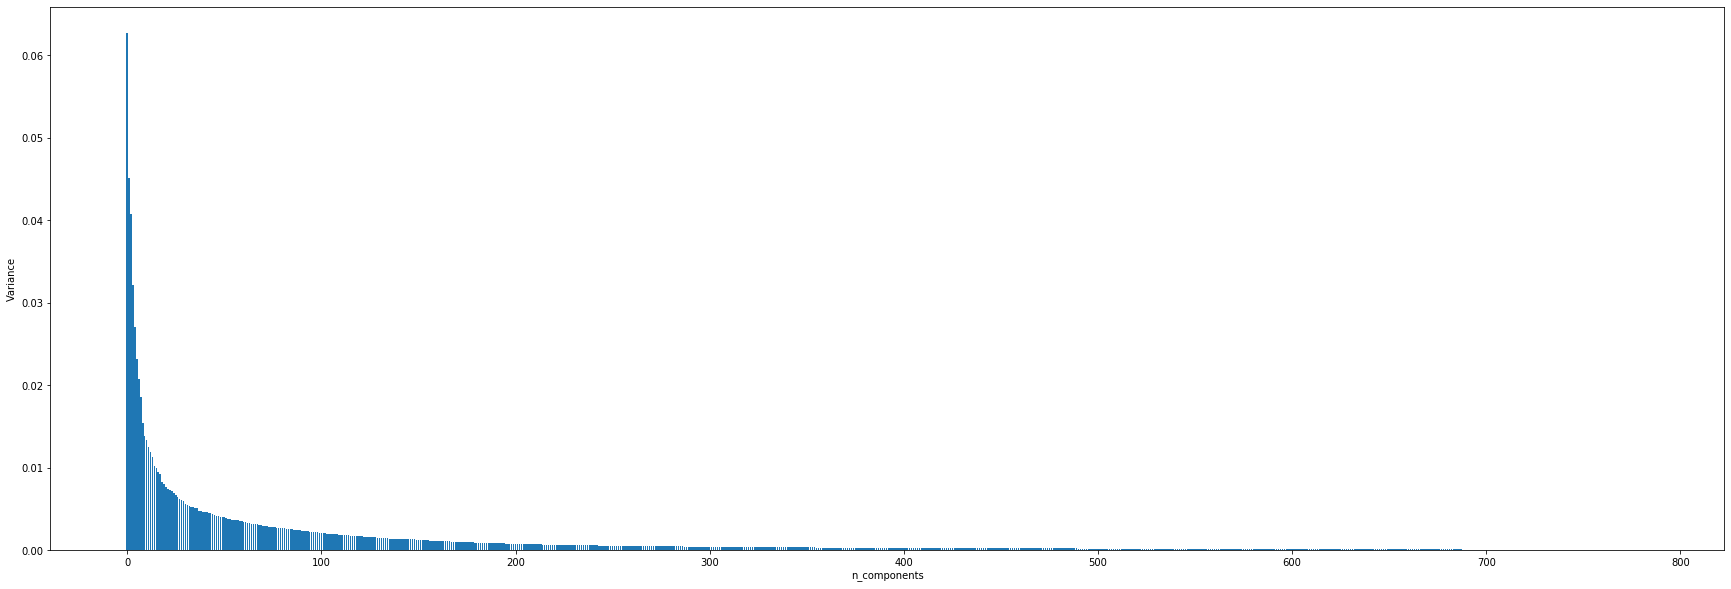

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

#standardized data
sc = StandardScaler().fit(train_b)
X_std_train = sc.transform(train_b)
X_std_test = sc.transform(test_b)

#If n_components is not set then all components are stored 
sklearn_pca = sklearnPCA().fit(X_std_train)
#train_pca_b = sklearn_pca.transform(X_std_train)
#test_pca_b = sklearn_pca.transform(X_std_test)

#Percentage of variance explained by each of the selected components.
#If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.
var_per = sklearn_pca.explained_variance_ratio_
cum_var_per = sklearn_pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(30,10))
ind = np.arange(len(var_per)) 
plt.bar(ind,var_per)
plt.xlabel('n_components')
plt.ylabel('Variance')

In [25]:
n_comp=len(cum_var_per[cum_var_per <= 0.90])
print("Keeping 90% Info with ",n_comp," components")
sklearn_pca = sklearnPCA(n_components=n_comp)
train_pca_b = sklearn_pca.fit_transform(X_std_train)
test_pca_b = sklearn_pca.transform(X_std_test)
print("Shape before PCA for Train: ",X_std_train.shape)
print("Shape after PCA for Train: ",train_pca_b.shape)
print("Shape before PCA for Test: ",X_std_test.shape)
print("Shape after PCA for Test: ",test_pca_b.shape)

Keeping 90% Info with  288  components
Shape before PCA for Train:  (33600, 784)
Shape after PCA for Train:  (33600, 288)
Shape before PCA for Test:  (8400, 784)
Shape after PCA for Test:  (8400, 288)


In [26]:
start_time = time.time()
clf.fit(train_pca_b[:i], train_labels[:i].values.ravel())
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
start_time = time.time()
score=clf.score(test_pca_b,test_labels)
print("Accuracy for grayscale: ",score)
scoretime = time.time() - start_time
print("Time consumed to score model: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))
case4=[score,fittime,scoretime]

Time consumed to fit model:  00:00:07
Accuracy for grayscale:  0.9191666666666667
Time consumed to score model:  00:00:08


# Comparison of 4 Cases

In [27]:
head =["Accuracy","FittingTime","ScoringTime"]
print("\t\t case1 \t\t\t case2 \t\t\t case3 \t\t\t case4")
for h, c1, c2, c3, c4 in zip(head, case1, case2, case3, case4):
    print("{}\t{}\t{}\t{}\t{}".format(h, c1, c2, c3, c4))

		 case1 			 case2 			 case3 			 case4
Accuracy	0.09345238095238095	0.9111904761904762	0.9196428571428571	0.9191666666666667
FittingTime	47.58054447174072	47.58054447174072	6.693852424621582	7.055261850357056
ScoringTime	38.618125915527344	10.263642072677612	8.609193563461304	8.67662763595581


# 4. Training Data Size Vs Accuracy , Fitting & Score Times 

Understanding how training data size affects accuracy,

In [28]:
from tqdm import tqdm

fit_time=[]
score=[]
score_time=[]
for j in tqdm(range(1000,31000,5000)):
    start_time = time.time()
    clf.fit(train_pca_b[:j], train_labels[:j].values.ravel())
    fit_time.append(time.time() - start_time)
    start_time = time.time()
    score.append(clf.score(test_pca_b,test_labels))
    score_time.append(time.time() - start_time)

100%|██████████| 6/6 [06:30<00:00, 81.87s/it]


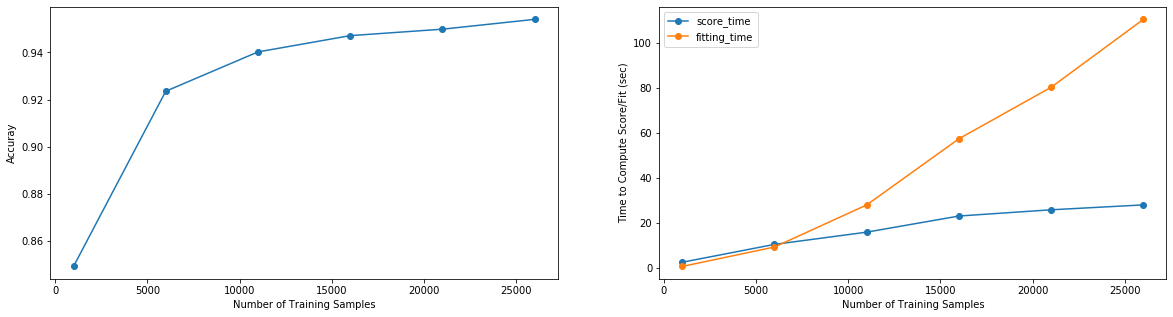

In [29]:
x=list(range(1000,31000,5000))
plt.figure(figsize=[20,5]);
ax1=plt.subplot(1, 2,1)
ax1.plot(x,score,'-o');
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuray')
ax2=plt.subplot(1, 2,2)
ax2.plot(x,score_time,'-o');
ax2.plot(x,fit_time,'-o');
plt.xlabel('Number of Training Samples')
plt.ylabel('Time to Compute Score/Fit (sec)')
plt.legend(['score_time','fitting_time'])

# 5. Parameter Selection for SVM using GridSearchCV

Out of parameters below, we will be playing with Gamma and C, where

Gamma is the parameter of a Gaussian Kernel (to handle non-linear classification)
and C the parameter for the soft margin cost function, also known as cost of misclassification. A large C gives you low bias and high variance and vice versa.

In [30]:
clf.get_params

<bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)>

In [31]:
parameters = {'gamma': [1, 0.1, 0.01, 0.001],
             'C': [1000, 100, 10, 1]} 

p = GridSearchCV(clf , param_grid=parameters, cv=3)

In [39]:
X=train_pca_b[:i]
y=train_labels[:i].values.ravel()
start_time = time.time()
p.fit(X,y)
elapsed_time = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

Time consumed to fit model:  00:07:22


In [33]:
print("Scores for all Parameter Combination: \n",p.cv_results_['mean_test_score'])
print("\nOptimal C and Gamma Combination: ",p.best_params_)
print("\nMaximum Accuracy acheieved on LeftOut Data: ",p.best_score_)

Scores for all Parameter Combination: 
 [0.113  0.1818 0.7794 0.9284 0.113  0.1818 0.7794 0.9284 0.113  0.1818
 0.7794 0.931  0.1124 0.176  0.7628 0.9192]

Optimal C and Gamma Combination:  {'C': 10, 'gamma': 0.001}

Maximum Accuracy acheieved on LeftOut Data:  0.931


In [34]:
C=p.best_params_['C']
gamma=p.best_params_['gamma']
clf=svm.SVC(C=C,gamma=gamma, random_state=42)

In [35]:
start_time = time.time()
clf.fit(train_pca_b[:i], train_labels[:i].values.ravel())
elapsed_time = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))
print("Accuracy for binary: ",clf.score(test_pca_b,test_labels))

Time consumed to fit model:  00:00:03
Accuracy for binary:  0.9371428571428572


In [36]:
start_time = time.time()
clf.fit(train_pca_b, train_labels.values.ravel())
elapsed_time = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))
print("Accuracy for binary: ",clf.score(test_pca_b,test_labels))

Time consumed to fit model:  00:01:17
Accuracy for binary:  0.9686904761904762


# Task-2

Iris Classification using SVM

In [4]:
import pandas as pd
from sklearn.datasets import load_iris 

In [5]:
iris=load_iris()

In [6]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [12]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [15]:
df['flower_name']=df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [16]:
from matplotlib import pyplot as plt 
%matplotlib inline

In [18]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

In [20]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [21]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [22]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


In [73]:
df0.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'flower_name'],
      dtype='object')

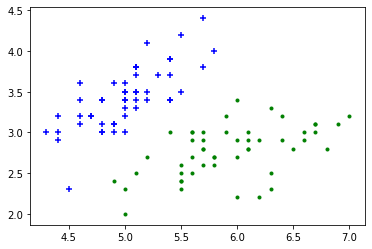

In [74]:
#plt.xlabel('sepal length(cm)')
#plt.ylabel('sepal width(cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='blue',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='green',marker='.')

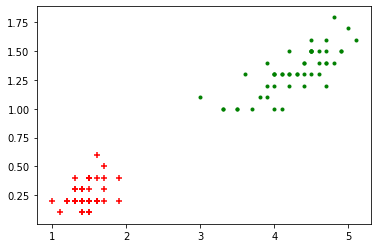

In [75]:
#plt.xlabel('petal length(cm)')
#plt.ylabel('petal width(cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='red',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green',marker='.')

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x=df.drop(['target','flower_name'],axis='columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
y=df.target
y

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,)

In [30]:
len(x_train)

120

In [31]:
len(x_test)

30

In [ ]:
Create SVM model

In [32]:
from sklearn.svm import SVC
model=SVC()

In [33]:
model.fit(x_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [34]:
model.score(x_test,y_test)

0.9666666666666667

In [51]:
from sklearn.svm import SVC
model=SVC(gamma=100)

In [52]:
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [53]:
model.score(x_test,y_test)

0.4

In [57]:
from sklearn.svm import SVC
model=SVC(C=10000)

In [58]:
model.fit(x_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [59]:
model.score(x_test,y_test)

0.9333333333333333

In [60]:
from sklearn.svm import SVC
model=SVC(kernel='linear')

In [61]:
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [62]:
model.score(x_test,y_test)

0.9333333333333333

In [63]:
from sklearn.svm import SVC
model=SVC(kernel='sigmoid')

In [64]:
model.fit(x_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [65]:
model.score(x_test,y_test)

0.23333333333333334

In [66]:
from sklearn.svm import SVC
model=SVC(kernel='poly')

In [67]:
model.fit(x_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [68]:
model.score(x_test,y_test)

0.9333333333333333